In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [59]:
digits = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) =  digits.load_data()

In [78]:
train_images=train_images.reshape([train_images.shape[0], 28, 28, 1])

In [79]:
train_images.shape

(60000, 28, 28, 1)

In [80]:
test_images=test_images.reshape([test_images.shape[0], 28, 28, 1])

In [81]:
test_images.shape

(10000, 28, 28, 1)

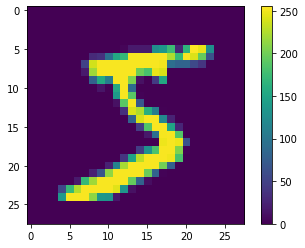

In [82]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [83]:
train_labels[0]

5

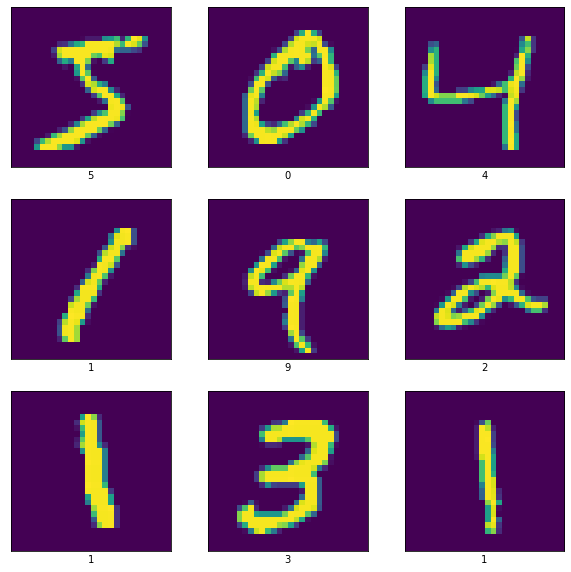

In [84]:
plt.figure(figsize = (10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(str(train_labels[i]),color="black")

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=[28, 28, 1], activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [86]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)             

In [88]:
model.fit(train_images, train_labels, epochs=10, shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1224 - accuracy: 0.9625
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0508 - accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0380 - accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0310 - accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0219 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0188 - accuracy: 0.9945
Epoch 8/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0143 - accuracy: 0.9958
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0149 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [66]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [67]:
predictions = probability_model.predict(test_images)

In [68]:
predictions[0]

array([5.1995108e-10, 2.8489706e-07, 2.7532167e-08, 8.1790198e-08,
       1.8139797e-06, 1.1057725e-08, 8.1137964e-14, 9.9999475e-01,
       6.5691657e-09, 3.0464407e-06], dtype=float32)

In [69]:
np.argmax(predictions[0])

7

In [70]:
test_labels[0]

7

In [65]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0486 - accuracy: 0.9892

Test accuracy: 0.9891999959945679


In [76]:
probability_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
test_loss, test_acc = probability_model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.4743 - accuracy: 0.9892

Test accuracy: 0.9891999959945679


In [ ]:
model.save('trained_model.h5')